In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data

df = pd.read_csv('marketing_AB.csv')

In [4]:
# Check 

df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
# Check if we have duplicates wrt user id

df.duplicated(subset = 'user id').sum()

0

In [6]:
# Drop unnessary columns 
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [8]:
df_cat = df[['test group','converted', 'most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

# Univariate analysis 

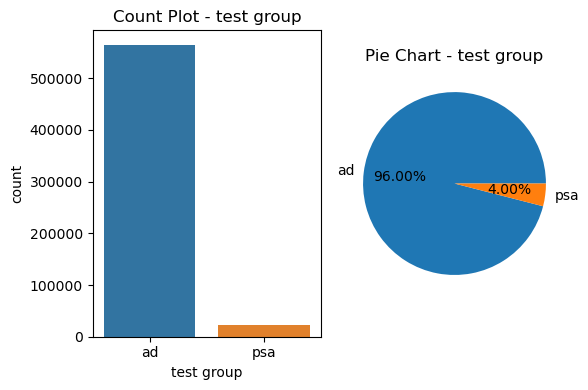

In [9]:
variable = 'test group'

plt.figure(figsize = (6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct= '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

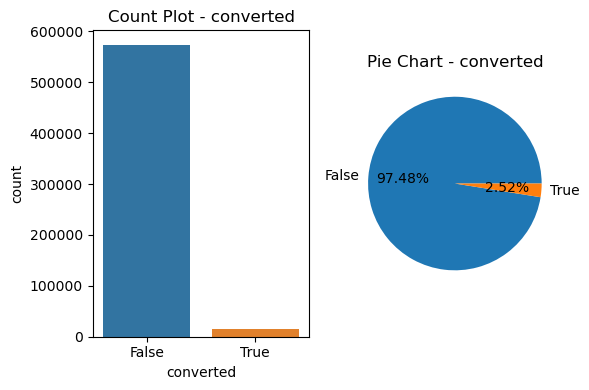

In [10]:
variable = 'converted'

plt.figure(figsize = (6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'Count Plot - {variable}')

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct= '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

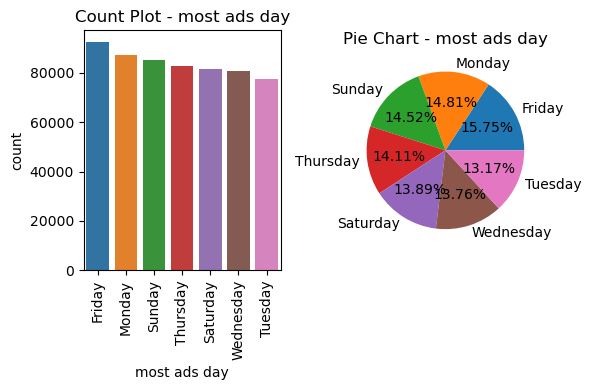

In [11]:
variable = 'most ads day'

plt.figure(figsize = (6, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads day'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct= '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

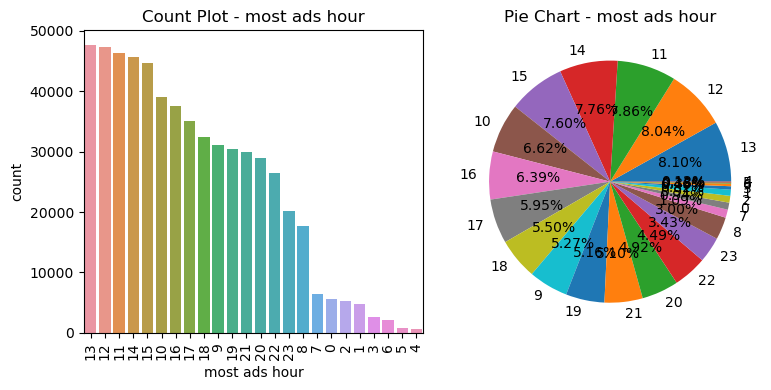

In [12]:
variable = 'most ads hour'

plt.figure(figsize = (8, 4))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order = df_cat['most ads hour'].value_counts().index)
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct= '%0.2f%%')
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [13]:
# Check the description stats of 'total ads'
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

/Users/christinesangphet/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


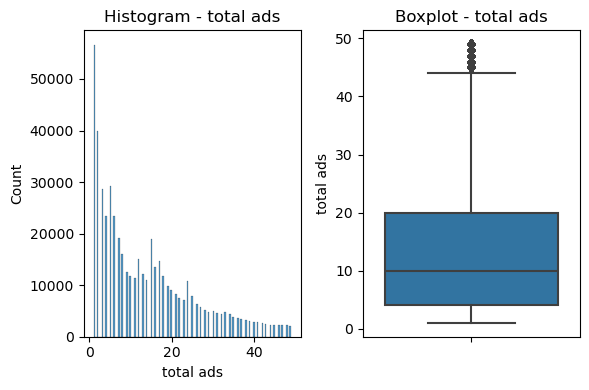

In [14]:
variable = 'total ads'

plt.figure(figsize = (6,4))

# Histogram 
plt.subplot(1, 2, 1)
# Filtering the data for a value close to the 75th percentile only for better visualization
sns.histplot(x=variable, data = df[df['total ads'] < 50])
plt.title(f'Histogram - {variable}')

# Pie chart 
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data = df[df['total ads'] < 50])
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Bivariate analysis

In [15]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


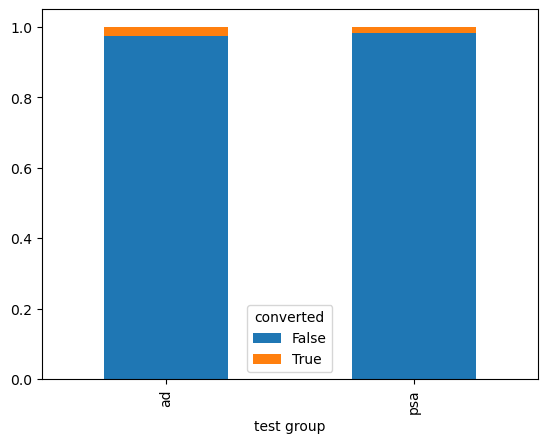

In [16]:
ct_conversion_test_group.plot.bar(stacked = True);

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


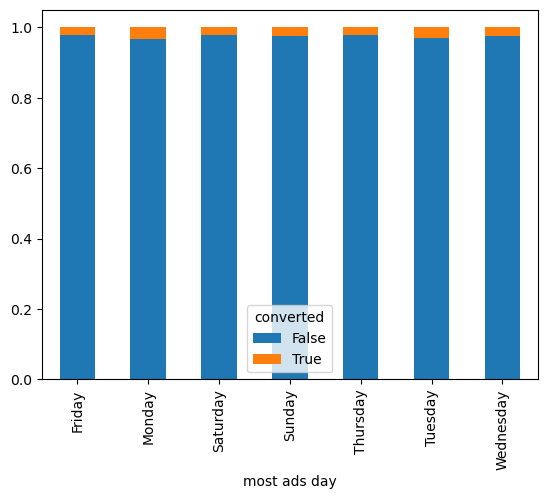

In [17]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values( by = True, ascending = False))
ct_conversion_day.plot.bar(stacked = True);

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


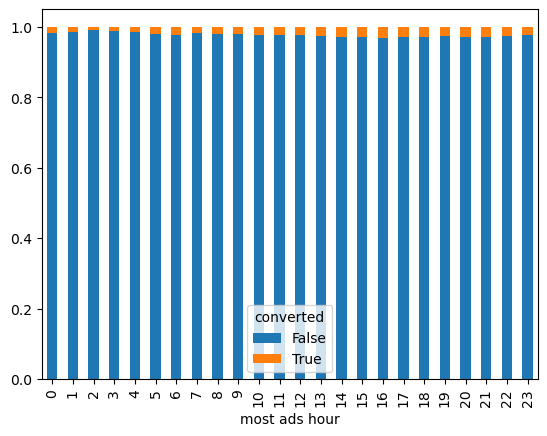

In [18]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index')
print(ct_conversion_hour.sort_values( by = True, ascending = False))
ct_conversion_hour.plot.bar(stacked = True);

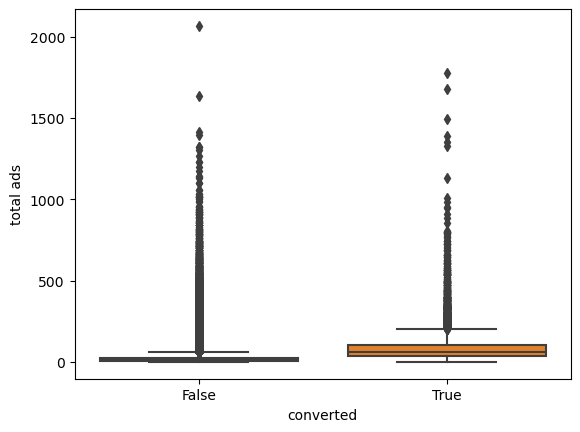

In [19]:
sns.boxplot(x = 'converted', y = 'total ads', data = df);

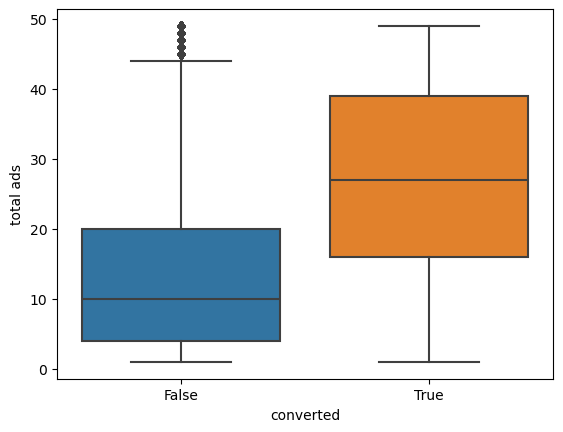

In [20]:
sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads'] < 50]);

# Statistical tests

Chi-Squared Test is best for: Analyzing categorical data to determine if there is an association between variables or if a distribution matches expected frequencies.

In [21]:
from scipy.stats import chi2_contingency

alpha = 0.05  # Significance level for the chi-squared test

for variable in df_cat.columns:
    # Skip the target variable 'converted' to avoid self-comparison
    if variable != 'converted':
        # Create a contingency table (cross-tabulation) between the categorical variable and 'converted'
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        # Calculate the total sample size from the contingency table
        sample_size = np.sum(contingency_table.values)

        # Perform the chi-squared test for independence
        chi2, p, _, _ = chi2_contingency(contingency_table)

        # Display the chi-squared test results
        print(f"\nChi-Squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2:.4f}")  # Print the test statistic rounded to 4 decimal places
        print(f"p-value: {p:.4e}")  # Print the p-value in scientific notation for precision

        # Check if the p-value indicates a statistically significant result
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
            # Reject the null hypothesis: there is a significant difference in conversion rates across groups
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")
            # Fail to reject the null hypothesis: conversion rates are not significantly different across groups

# Print the total sample size with a preceding blank line for clarity
print(f"\nSample Size: {sample_size}")


Chi-Squared test for test group vs. converted:
Chi-squared value: 54.0058
p-value: 1.9990e-13
The difference in conversion rates across test group is statistically significant.

Chi-Squared test for most ads day vs. converted:
Chi-squared value: 410.0479
p-value: 1.9322e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-Squared test for most ads hour vs. converted:
Chi-squared value: 430.7687
p-value: 8.0276e-77
The difference in conversion rates across most ads hour is statistically significant.

Sample Size: 588101
